In [1]:
import tensorflow as tf
import numpy as np
import os 
import glob
import random
import tensorflow.keras as keras
import keras.layers as layers 



In [3]:
# diretório a ser salvo
tfrecords_dir = "tfrecords_position"

# diretório das imagens
images_dir = r"dataset\imagens\*\*"


annotations = glob.glob(images_dir)
random.shuffle(annotations)
print("total de imagens: ", len(annotations))

train_annotations = annotations[256:]
val_annotations = annotations[:256]

print(train_annotations[0:10])


#num_samples is the number of data samples on each TFRecord file. (TEM Q SER MENORIGUAL DO Q O NUMERO DE IMAGENS)
#num_tfrecords is total number of TFRecords that we will create.
num_samples_train = 2048
num_tfrecords_train = len(train_annotations) // num_samples_train
if len(train_annotations) % num_samples_train:
    num_tfrecords_train += 1  # add one record if there are any remaining samples
    
    
num_samples_val = 256
num_tfrecords_val = len(val_annotations) // num_samples_val
if len(val_annotations) % num_samples_val:
    num_tfrecords_val += 1  # add one record if there are any remaining samples
    

if not os.path.exists(tfrecords_dir+"\\train"):    
    os.makedirs(tfrecords_dir+"\\train")  # creating TFRecords output folder    

if not os.path.exists(tfrecords_dir+"\\val"):
    os.makedirs(tfrecords_dir+"\\val")  # creating TFRecords output folder    
    
print("num_tfrecords for train {}".format(num_tfrecords_train))
print("num_tfrecords for val {}".format(num_tfrecords_val))

total de imagens:  4518
['dataset\\imagens\\4\\ponto2246_2.png', 'dataset\\imagens\\3\\11315_4.png', 'dataset\\imagens\\1\\019_5.png', 'dataset\\imagens\\1\\01207_0.png', 'dataset\\imagens\\4\\ponto51248_1.png', 'dataset\\imagens\\2\\10351_5.png', 'dataset\\imagens\\4\\ponto2309_2.png', 'dataset\\imagens\\4\\ponto2236.png', 'dataset\\imagens\\3\\11108_0.png', 'dataset\\imagens\\1\\01198_2.png']
num_tfrecords for train 3
num_tfrecords for val 1


In [4]:
def image_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(
        bytes_list=tf.train.BytesList(value=[tf.io.encode_png(value).numpy()])
    )


def bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value.encode()]))


def float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))


def int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def float_feature_list(value):
    """Returns a list of float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=value))


def create_example(image, path, class_id):
    feature = {
        "image": image_feature(image),
        "path": bytes_feature(path),        
        "category_id": int64_feature(class_id),                
    }
    return tf.train.Example(features=tf.train.Features(feature=feature))


def parse_tfrecord_fn(example):
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "path": tf.io.FixedLenFeature([], tf.string),
        "category_id": tf.io.FixedLenFeature([], tf.int64),        
    }
    example = tf.io.parse_single_example(example, feature_description)
    example["image"] = tf.io.decode_png(example["image"], channels=3)
    
    return example

In [7]:
import cv2 as cv




for tfrec_num in range(num_tfrecords_train):
    samples = annotations[(tfrec_num * num_samples_train) : ((tfrec_num + 1) * num_samples_train)]

    with tf.io.TFRecordWriter(tfrecords_dir + "/train/file_%.2i-%i.tfrec" % (tfrec_num, len(samples))) as writer:
        for sample in samples:
            image_path = sample #f"{images_dir}/{sample['image_id']:012d}.jpg"            
            image = tf.io.decode_png(tf.io.read_file(image_path))
                
            class_id = int(image_path.split("\\")[2])            
            # print(image_path, class_id)            

            example = create_example(image, image_path, class_id)
            writer.write(example.SerializeToString())
            

            
for tfrec_num in range(num_tfrecords_val):
    samples = annotations[(tfrec_num * num_samples_val) : ((tfrec_num + 1) * num_samples_val)]

    with tf.io.TFRecordWriter(tfrecords_dir + "/val/file_%.2i-%i.tfrec" % (tfrec_num, len(samples))) as writer:
        for sample in samples:
            image_path = sample #f"{images_dir}/{sample['image_id']:012d}.jpg"            
            image = tf.io.decode_png(tf.io.read_file(image_path))
            
            class_id = int(image_path.split("\\")[2])            
            #print(image_path, class_id)        

            example = create_example(image, image_path, class_id)
            writer.write(example.SerializeToString())            

category_id: 1
path: b'dataset\\imagens\\1\\01324_3.png'
Image shape: (224, 224, 3)


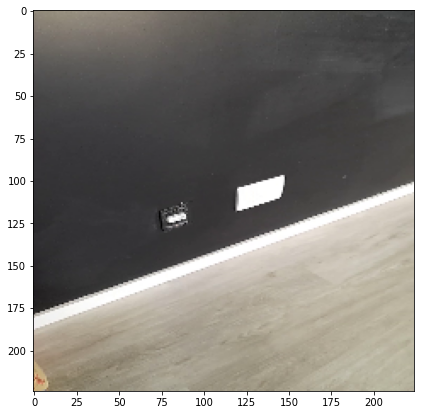

category_id: 0
path: b'dataset\\imagens\\0\\00315_4.png'
Image shape: (224, 224, 3)


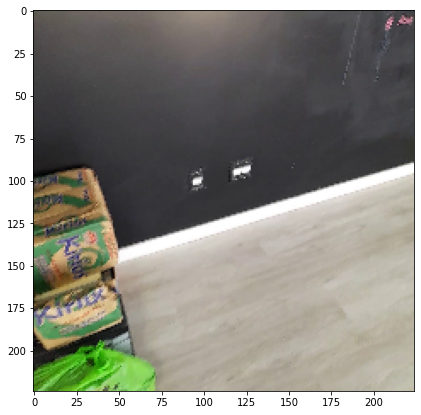

category_id: 3
path: b'dataset\\imagens\\3\\11330_4.png'
Image shape: (224, 224, 3)


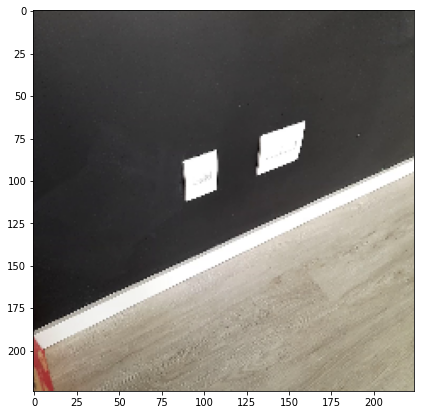

category_id: 2
path: b'dataset\\imagens\\2\\10399_5.png'
Image shape: (224, 224, 3)


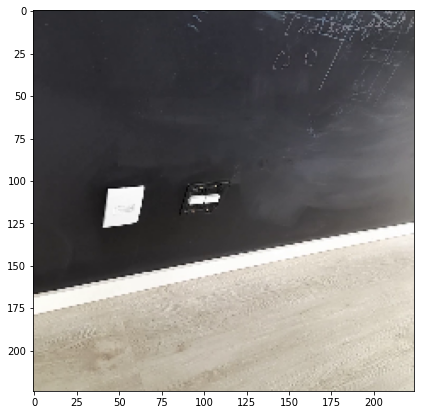

category_id: 3
path: b'dataset\\imagens\\3\\11297_2.png'
Image shape: (224, 224, 3)


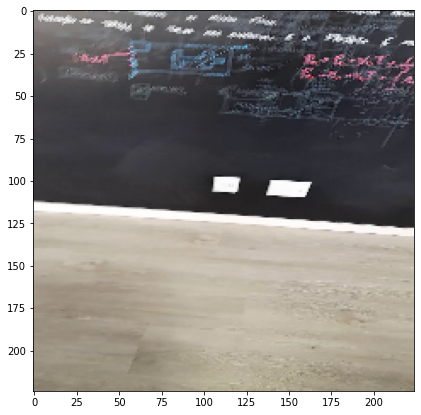

category_id: 3
path: b'dataset\\imagens\\3\\11252_0.png'
Image shape: (224, 224, 3)


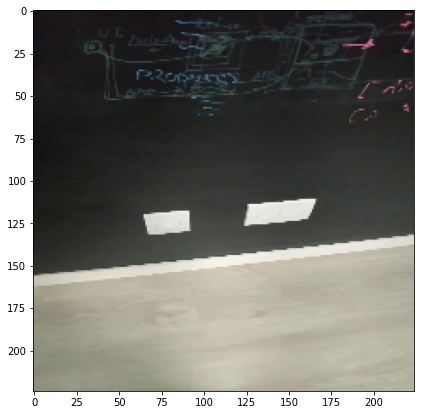

category_id: 0
path: b'dataset\\imagens\\0\\00114_5.png'
Image shape: (224, 224, 3)


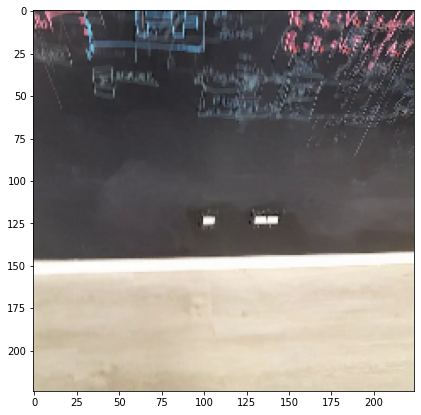

category_id: 1
path: b'dataset\\imagens\\1\\01381_3.png'
Image shape: (224, 224, 3)


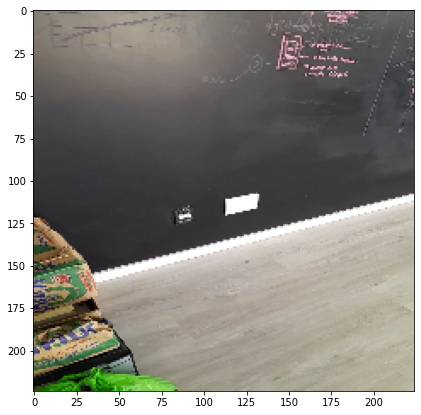

category_id: 2
path: b'dataset\\imagens\\2\\10300_3.png'
Image shape: (224, 224, 3)


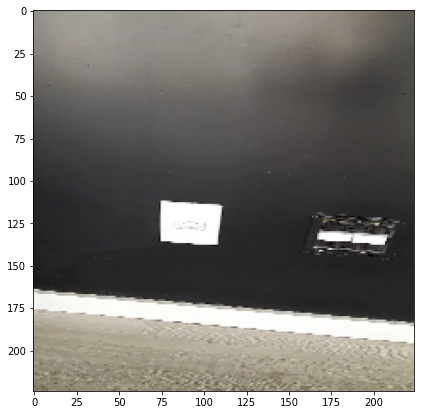

category_id: 2
path: b'dataset\\imagens\\2\\10273_0.png'
Image shape: (224, 224, 3)


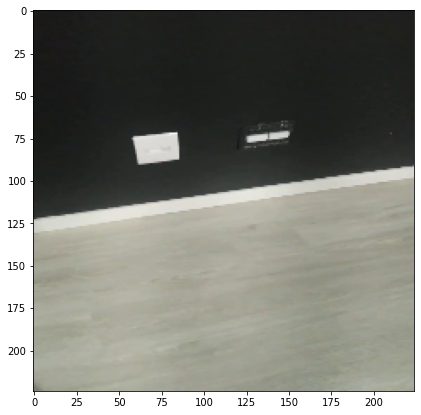

category_id: 4
path: b'dataset\\imagens\\4\\ponto2387_2.png'
Image shape: (224, 224, 3)


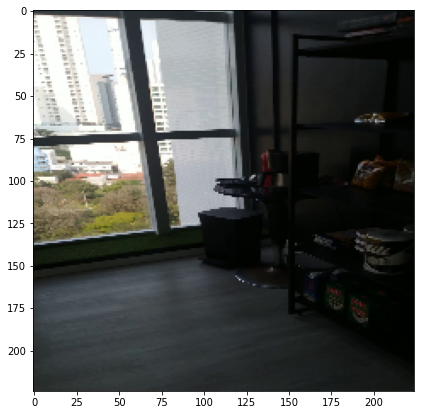

category_id: 4
path: b'dataset\\imagens\\4\\ponto2402_2.png'
Image shape: (224, 224, 3)


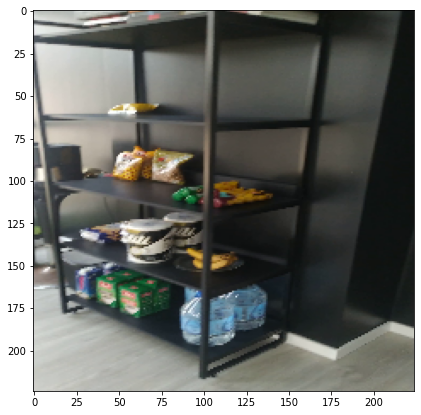

category_id: 2
path: b'dataset\\imagens\\2\\10201_2.png'
Image shape: (224, 224, 3)


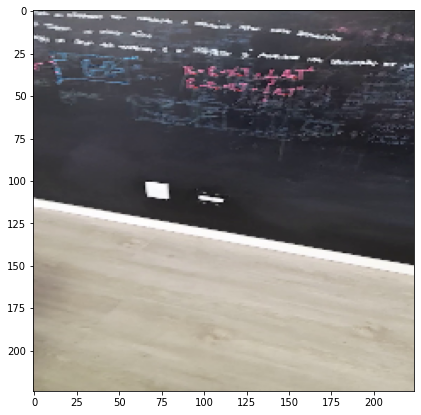

category_id: 4
path: b'dataset\\imagens\\4\\ponto2410.png'
Image shape: (224, 224, 3)


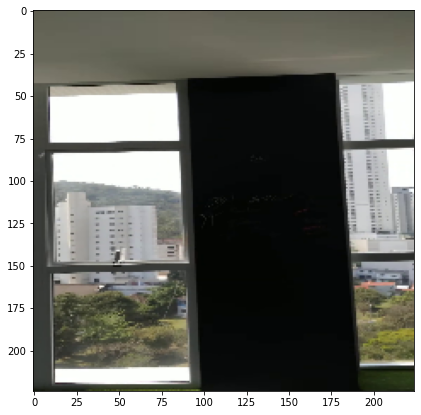

category_id: 3
path: b'dataset\\imagens\\3\\11393_2.png'
Image shape: (224, 224, 3)


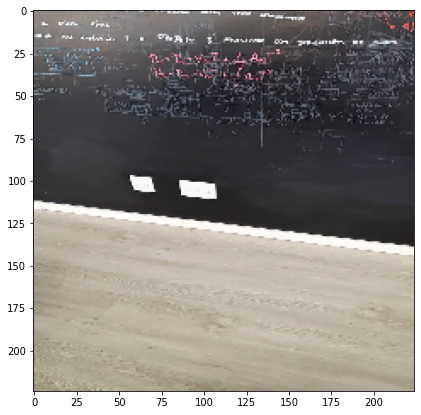

category_id: 0
path: b'dataset\\imagens\\0\\00264_4.png'
Image shape: (224, 224, 3)


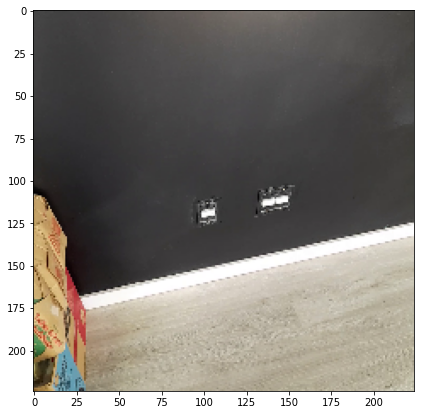

category_id: 3
path: b'dataset\\imagens\\3\\11246_1.png'
Image shape: (224, 224, 3)


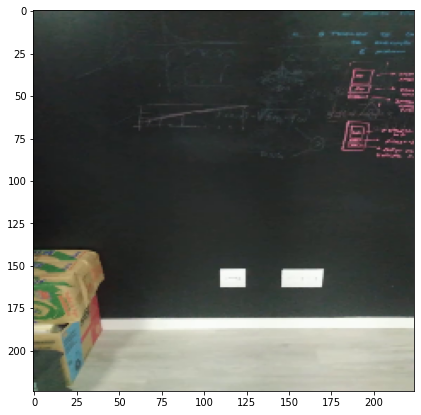

category_id: 1
path: b'dataset\\imagens\\1\\01168_0.png'
Image shape: (224, 224, 3)


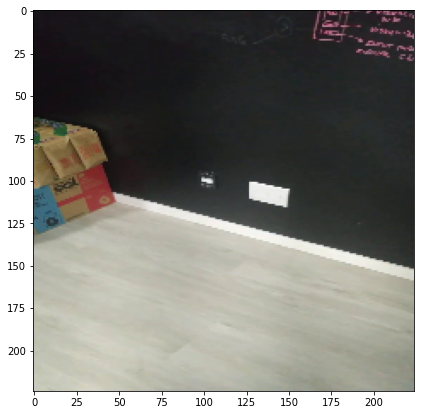

category_id: 4
path: b'dataset\\imagens\\4\\ponto2294.png'
Image shape: (224, 224, 3)


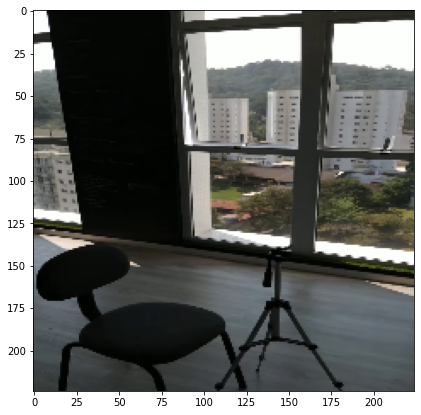

category_id: 3
path: b'dataset\\imagens\\3\\11423_4.png'
Image shape: (224, 224, 3)


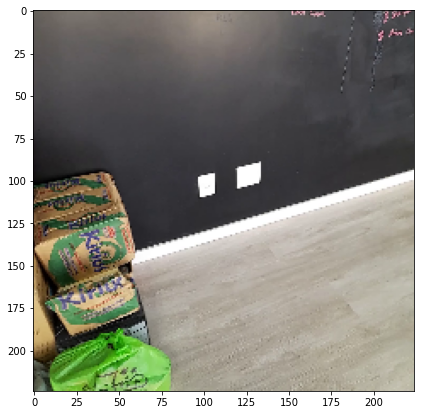

In [9]:
import matplotlib.pyplot as plt

raw_dataset = tf.data.TFRecordDataset(f"{tfrecords_dir}/train/file_00-{num_samples_train}.tfrec")
parsed_dataset = raw_dataset.map(parse_tfrecord_fn)

for features in parsed_dataset.take(20):
    for key in features.keys():
        if key != "image":
            print(f"{key}: {features[key]}")

    print(f"Image shape: {features['image'].shape}")
    plt.figure(figsize=(7, 7))
    plt.imshow(features["image"].numpy())
    plt.show()